# Introduction:

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.

# Purpose:

This guided project serves as a practical means of exploring and cleaning datasets. In the data, there are several other columns containing answers to questions about the Star Wars movies. 

For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

# Data Dictionary:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location` (Census Region) — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a `Yes` or `No` response

In [1]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Phase 1: Initial Data Exploration

In [2]:
star_wars_raw = pd.read_csv('star_wars.csv',encoding='ISO-8859-1')
star_wars_raw.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Observations after initial look at the data:

- __1. Column names should be shortened__
- __2. Unnamed Column # `N` are answers from the previous question asked, these values can be concatted into a single list value for one column
- __3. Lots of missing values, depending on the quality of the answer we can imputate values or delete__
- __4. `Have you seen any of the 6 films in the Star Wars franchise?`
and `Do you consider yourself to be a fan of the Star Wars film franchise?` should only have `Yes` or `No` , but contain `NaN` values.__

# Phase 2: Data Cleaning 

In [3]:
#Both represent Yes/No questions. They can also be NaN where a 
#respondent chooses not to answer a question.
#Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison. Lets map them

yes_no_map = {
    "Yes":True,
    "No":False
}

star_wars_raw['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars_raw['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars_raw['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars_raw['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)

print(star_wars_raw['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print('-----------------')
print(star_wars_raw['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
-----------------
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [4]:
movie_name_maps ={
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}
rename_cols = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

for c in star_wars_raw.columns[3:9]:
    star_wars_raw[c] = star_wars_raw[c].map(movie_name_maps)

star_wars_raw = star_wars_raw.rename(columns=rename_cols)

In [5]:
star_wars_raw

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,True,True,True,True,True,True,True,True,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [6]:
star_wars_raw[star_wars_raw.columns[9:15]] = star_wars_raw.loc[:,
                                                               star_wars_raw.columns[9:15]].astype(float)

movie_rank_col_rename = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14": "ranking_6"
}
star_wars_raw = star_wars_raw.rename(columns=movie_rank_col_rename)

# Phase 3: Graphing

Text(0, 0.5, 'Ranking (1 most favorite, 6 least favorite)')

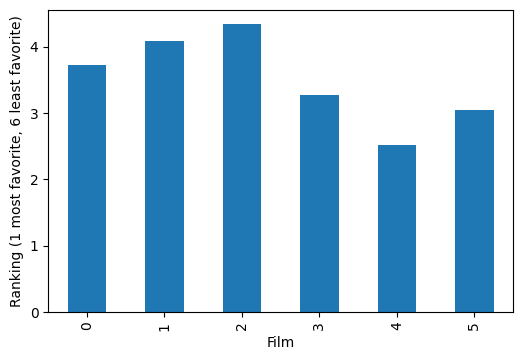

In [7]:
%matplotlib inline
means =star_wars_raw[star_wars_raw.columns[9:15]].mean()
rankings = means.reset_index()

rankings.plot(kind='bar',legend=False)
plt.xlabel('Film')
plt.ylabel('Ranking (1 most favorite, 6 least favorite)')
# ax.get_legend().remove()

In our data cleaning and transformation so far we have:
- mapped values for two columns, changing them from str columns to bool for easier analyis
- mapped values from the columns asking which movie users have seen 
- renamed cumbersome column names for easier analysis
- found the mean rank of the films by survey takers, and we see Star Wars Episode V, ranks the best

Personally I think Episode V ranks the best because the plotline resonated more with fans.

Text(0, 0.5, 'Total Views')

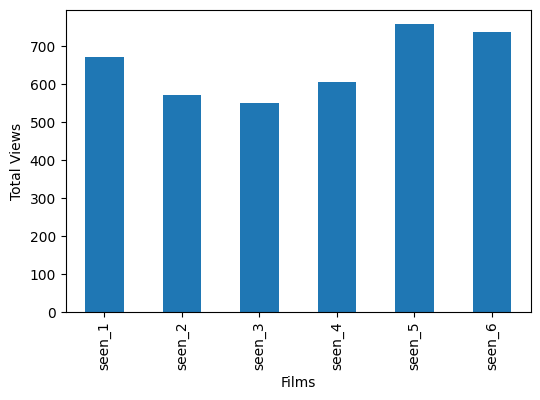

In [8]:
%matplotlib inline
views  = star_wars_raw[star_wars_raw.columns[3:9]].sum()
views = views.reset_index()
views.columns = ['Film','Views']
views.plot(kind='bar',x='Film',y='Views',legend=False)
plt.xlabel('Films')
plt.ylabel('Total Views')

Episodes V and VI have more views, versus Episodes 2-3, which have the least amount of views.
The results, in my opinion, are shaped this way because Episodes 4-6 are the original three films. Most likely considered the classic films, so many fans of the series would consider watching them important.

In [12]:
sw_fans = star_wars_raw[star_wars_raw['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
st_fans = star_wars_raw[star_wars_raw['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']


males = star_wars_raw[star_wars_raw['Gender']== 'Male']
female = star_wars_raw[star_wars_raw['Gender']=='Female']


male_sw_fans = star_wars_raw[
    (star_wars_raw['Do you consider yourself to be a fan of the Star Wars film franchise?']==True) 
    & (star_wars_raw['Gender']== "Male")]

female_sw_fans = star_wars_raw[
    (star_wars_raw['Do you consider yourself to be a fan of the Star Wars film franchise?']==True) 
    & (star_wars_raw['Gender']== "Female")]

male_st_fans = star_wars_raw[
    (star_wars_raw['Do you consider yourself to be a fan of the Star Trek franchise?'] == True) 
    & (star_wars_raw['Gender']=="Male")
    
]
female_st_fans = star_wars_raw[
    (star_wars_raw['Do you consider yourself to be a fan of the Star Trek franchise?'] == True) 
    & (star_wars_raw['Gender']=="Female")
    
]


Text(0.5, 1.0, 'How Star Trek Fans Rank the Movies')

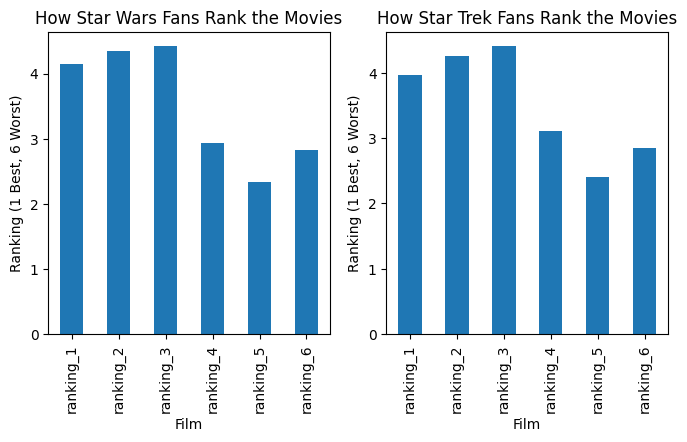

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sw_fans[sw_fans.columns[9:15]].mean().plot(kind='bar')
# plt.yscale('log')
plt.xlabel('Film')
plt.ylabel('Ranking (1 Best, 6 Worst)')
plt.title('How Star Wars Fans Rank the Movies')

plt.subplot(1, 2, 2)
st_fans[st_fans.columns[9:15]].mean().plot(kind='bar')
# plt.yscale('log')
plt.xlabel('Film')
plt.ylabel('Ranking (1 Best, 6 Worst)')
plt.title('How Star Trek Fans Rank the Movies')

Text(0.5, 1.0, 'Female Star Wars Rankings')

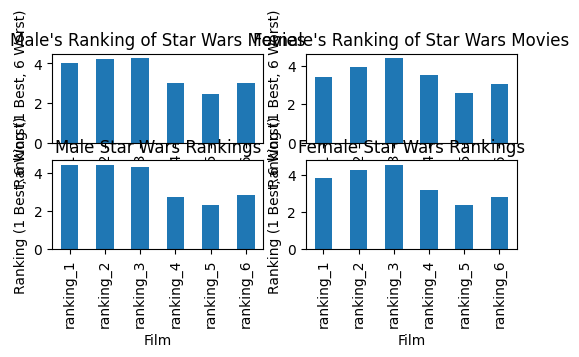

In [38]:
# plt.figure(figsize=(8,8))
plt.tight_layout(h_pad=8)

plt.subplot(3, 2, 1)
males[males.columns[9:15]].mean().plot(kind='bar')
plt.xlabel('Film')
plt.ylabel('Ranking (1 Best, 6 Worst)')
plt.title('Male\'s Ranking of Star Wars Movies')

plt.subplot(3, 2, 2)
female[female.columns[9:15]].mean().plot(kind='bar')
plt.xlabel('Film')
plt.ylabel('Ranking (1 Best, 6 Worst)')
plt.title('Female\'s Ranking of Star Wars Movies')


plt.subplot(3, 2, 3)
male_sw_fans[male_sw_fans.columns[9:15]].mean().plot(kind='bar')
plt.xlabel('Film')
plt.ylabel('Ranking (1 Best, 6 Worst)')
plt.title('Male Star Wars Rankings')

plt.subplot(3, 2, 4)
female_sw_fans[female_sw_fans.columns[9:15]].mean().plot(kind='bar')
plt.xlabel('Film')
plt.ylabel('Ranking (1 Best, 6 Worst)')
plt.title('Female Star Wars Rankings')